In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/Users/perpetualokafor/Downloads/Used-car-price-prediction---LHL-Capstone-Project/cars_cleaned.csv") 
df.head(2)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black
1,19900,2004,ford,f250 super duty,good,8 cylinders,diesel,88000,clean,automatic,4wd,full-size,pickup,blue


In [6]:
df=df.sample(n = 1000)

In [12]:
df['cylinders'].unique()

array(['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders',
       '10 cylinders', 'other'], dtype=object)

In [4]:
df.shape

(1000, 14)

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score, r2_score, accuracy_score,mean_squared_error, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline, FeatureUnion
# numerical preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
# categorical preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
# models?
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

In [15]:
numerical=list(df.dtypes[df.dtypes!='object'].index)
categorical=list(df.dtypes[df.dtypes=='object'].index)

In [16]:
categorical_preprocessing = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))])
numerical_preprocessing = Pipeline([('scaling', StandardScaler())])
# categorical_preprocessing = Pipeline([('le', DataFrameMapper([(categorical, LabelEncoder())])),])
# Applying Transformer 
preprocess = ColumnTransformer([
    ('categorical_preprocessing', categorical_preprocessing, categorical),
    ('numerical_preprocessing', numerical_preprocessing, ['year', 'odometer'])])

In [17]:
X=df.drop(columns=['price'])
y=df['price']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [19]:
feature_union = FeatureUnion([('svd', TruncatedSVD(n_components=3)), 
                              ('select_best', SelectKBest(k=6))])

In [20]:
pipe_lr = Pipeline([
                    ('preprocess',preprocess),
                    ('features',feature_union),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([
                    ('preprocess',preprocess),
                    ('features',feature_union),
                    ('DT',DecisionTreeRegressor(random_state=42))])
pipe_rf = Pipeline([
                    ('preprocess',preprocess),
                    ('features',feature_union),
                    ('RF',RandomForestRegressor(random_state=42))])
pipe_knn = Pipeline([
                     ('preprocess',preprocess),
                    ('features',feature_union),
                    ('KNN', KNeighborsRegressor())])
pipe_svm = Pipeline([
                     ('preprocess',preprocess),
                    ('features',feature_union),
                     ('SVM', svm.SVR())])
pipe_xgb = Pipeline([
                     ('preprocess',preprocess),
                    ('features',feature_union),
                     ('XGB', XGBRegressor(random_state=42))])

In [21]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ["squared_error", "friedman_mse"],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

In [22]:
lr_grid_search = GridSearchCV(pipe_lr,
        param_grid=lr_param_grid,
        scoring='r2',
        cv=3)
dt_grid_search = GridSearchCV(pipe_dt,
        param_grid=dt_param_grid,
        scoring='r2',
        cv=3)
rf_grid_search = GridSearchCV(pipe_rf,
        param_grid=rf_param_grid,
        scoring='r2',
        cv=3)
knn_grid_search = GridSearchCV(pipe_knn,
        param_grid=knn_param_grid,
        scoring='r2',
        cv=3)
svm_grid_search = GridSearchCV(pipe_svm,
        param_grid=svm_param_grid,
        scoring='r2',
        cv=3)
xgb_grid_search = GridSearchCV(pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='r2',
        cv=3)

In [23]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

In [24]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))

Logistic Regression Test Accuracy: 0.556149207795223
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7358761840996392
Decision Trees Best Params: {'DT__criterion': 'squared_error', 'DT__max_depth': 5, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 4}
Random Forest Test Accuracy: 0.7703289605635352
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5}
K-Nearest Neighbors Test Accuracy: 0.7067188213656327
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
Support Vector Machines Test Accuracy: 0.223203977610948
Support Vector Machines Best Params: {'SVM__C': 6, 'SVM__kernel': 'linear'}
XGBoost Test Accuracy: 0.7626733281538527
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 3, 'XGB__min_child_weight': 2, 'XGB__n_estimators': 50, 'XGB__subsample': 0.5}


In [27]:
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
grid = GridSearchCV(pipe_rf, param_grid=rf_param_grid, cv=5, verbose=True, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packag

Best test set accuracy: 0.7705769548620169
Achieved with hyperparameters: {'RF__max_depth': 6, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 4}


In [28]:
import pickle
pickle.dump(best_model, open('model.pkl', 'wb'))

In [31]:
#lets open the model
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [33]:
#lets predict with the loaded model
y_pred = loaded_model.predict(X_test)
# y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
result = loaded_model.score(X_test, y_test)
print(result)

0.7705769548620169


In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

,Actual,Predicted
9825,5400,9804.01
52170,5225,4365.96
56729,10995,13093.00
48674,2000,6221.90
13890,33990,35016.49
38265,5500,4425.75
18139,6500,9717.81
45039,7800,13374.74
14189,5950,4603.75
20204,17500,14766.69


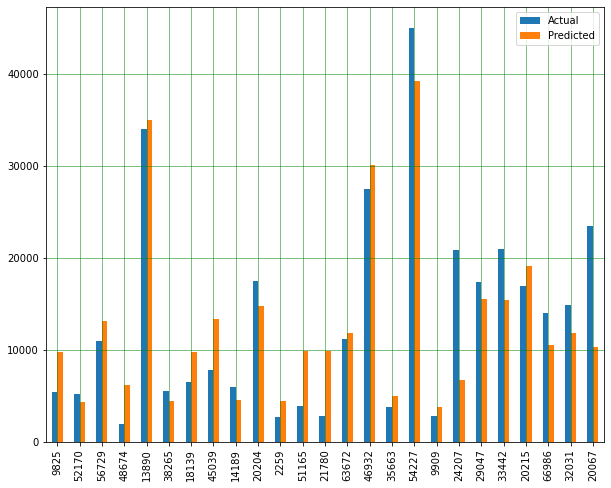

In [41]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
'pontiac', 
'nissan', 
'honda', 
'ram', 
'ford', 
'kia', 
'chevrolet',
       
    'mitsubishi', 
    'jaguar', 
    'toyota', 
    'gmc', '
    volkswagen',
       'mercedes-benz', 'audi', 'subaru', 'cadillac', 'bmw', 'hyundai',
       'jeep', 'buick', 'acura', 'chrysler', 'volvo', 'lexus', 'rover',
       'saturn', 'lincoln', 'mazda', 'infiniti', 'dodge', 'mini',
       'mercury', 'fiat', 'porsche'